In [2]:
import pandas as pd
import numpy as np

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

#### 피봇테이블

- 가지고 있는 데이터원본을 원하는 형태의 가공된 정보로 보여주는 것
    - 자료의 형태를 변경하기 위해 많이 사용하는 방법  
    

- 좌측표는 제품이 생산될 때 마다 코드, 크기, 생산 수량을 기록 오른쪽은 지역별로 제품생산코드를 요약하여 어떤 제품을 몇번 생산했는지 요약
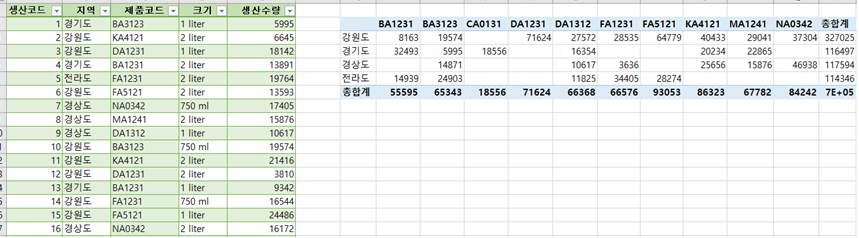


- 좌측표는 제품이 생산될 때 마다 코드, 크기, 생산 수량을 기록 오른쪽은 제품 크기별로 각 제품이 몇번 생산 되었는지 요약
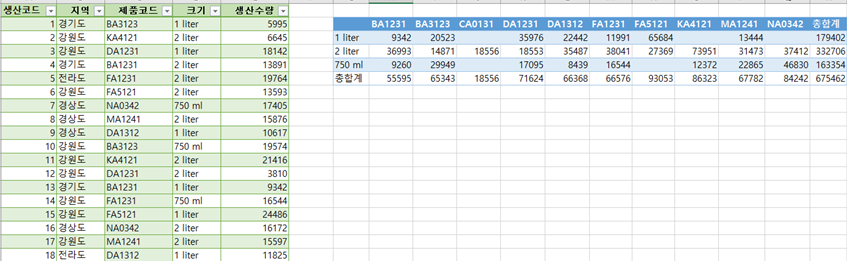

- 방법 : 두개의 키를 사용해서 데이터를 선택

- pivot_table(data,values=None,index=None,columns=None,aggfunc='mean',margins=False,margins_name='All')

    - data : 분석할 데이터 프레임. 메서드 형식일때는 필요하지 않음 ex)df1.pivot_table()
    - values : 분석할 데이터 프레임에서 분석할 열
    - index :  행 인덱스로 들어갈 키열 또는 키열의 리스트
    - columns : 열 인덱스로 들어갈 키열 또는 키열의 리스트
    - fill_value : NaN이 표출될 때 대체값 지정
    - margins : 모든 데이터를 분석한 결과를 행으로 표출할 지 여부
    - margins_name : margins가 표출될 때 그 열(행)의 이름`

#### 피봇테이블을 작성할 때 반드시 설정해야 되는 인수
- data : 사용 데이터 프레임
- index : 행 인덱스로 사용할 필드(기준 필드로 작용됨)
- 인덱스 명을 제외한 나머지 값(data)은 수치 data 만 사용함
- 기본 함수가 평균(mean)함수 이기 때문에 각 데이터의 평균값이 반환

In [4]:
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}

columns = ["도시", "연도", "인구", "지역"]
df1 = pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [6]:
# 각 도시에 대한 연도별 인구 평균
df1.pivot_table(index='도시',columns='연도',values='인구')


연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


In [7]:
# 각 지역별 도시에 대한 연도별 인구 평균
df1.pivot_table(index=['지역','도시'],columns='연도',values='인구')

연도           2005       2010       2015
지역  도시                                 
경상권 부산  3512547.0  3393191.0  3448737.0
수도권 서울  9762546.0  9631482.0  9904312.0
    인천        NaN   263203.0  2890451.0

In [10]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')[['age','sex','class','fare','survived']]
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [14]:
# 선실 등급별로 숙박객의 성별 평균 나이
pdf1 = pd.pivot_table(df,
                     index='class',
                     columns = 'sex',
                     values='age',
                     aggfunc='mean')
pdf1

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [16]:
# 각 선실 등급별 숙박객의 성별에따른 생존자 수와 생존율
pdf1 = pd.pivot_table(df,
                     index= 'class',
                     columns = 'sex',
                     values = 'survived',
                     aggfunc = ['sum','mean'])
pdf1

sum           mean          
sex    female male    female      male
class                                 
First      91   45  0.968085  0.368852
Second     70   17  0.921053  0.157407
Third      72   47  0.500000  0.135447

In [17]:
# 선실 등급에 따른 성별에 대해 생존여부별로 나이와 티켓값의 평균과 최대값을 산출
pdf3 = pd.pivot_table(df,
                     index = ['class','sex'],
                     columns = 'survived',
                     values = ['age','fare'],
                     aggfunc = ['mean','max'])
pdf3

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  
       male     69.55   56.4958

### 그룹 분석

- 만약 키가 지정하는 조건에 맞는 데이터가 하나 이상이라서 데이터 그룹을 이루는 경우에는 그룹의 특성을 보여주는 그룹분석(group analysis)을 해야 함

    - 그룹분석은 피봇테이블과 달리 키에 의해서 결정되는 데이터가 여러개가 있을 경우 미리 지정한 연산을 통해 그 그룹 데이터의 대표값을 계산 하는 것


- 판다스에서는 groupby 메서드를 사용하여 아래 내용 처럼 그룹분석을 진행

    - 분석하고자 하는 시리즈나 데이터프레임에 groupby 메서드를 호출하여 그룹화 수행

    - 그룹 객체에 대해 그룹연산을 수행

#### groupby 메서드¶
- groupby 메서드는 데이터를 그룹 별로 분류하는 역할을 함 

- groupby 메서드의 인수

    - 열 또는 열의 리스트

    - 행 인덱스

- 연산 결과로 그룹 데이터를 나타내는 GroupBy 클래스 객체를 반환
    - 이 객체에는 그룹별로 연산을 할 수 있는 그룹연산 메서드가 있음

#### GroupBy 클래스 객체의 그룹연산 메서드

- size, count: 그룹 데이터의 갯수

- mean, median, min, max: 그룹 데이터의 평균, 중앙값, 최소, 최대

- sum, prod, std, var, quantile : 그룹 데이터의 합계, 곱, 표준편차, 분산, 사분위수

- first, last: 그룹 데이터 중 가장 첫번째 데이터와 가장 나중 데이터


#### 이 외에도 많이 사용되는 그룹 연산

- agg, aggregate

    - 만약 원하는 그룹연산이 없는 경우 함수를 만들고 이 함수를 agg에 전달한다.

    - 또는 여러가지 그룹연산을 동시에 하고 싶은 경우 함수 이름 문자열의 리스트를 전달한다.

- describe

    - 하나의 그룹 대표값이 아니라 여러개의 값을 데이터프레임으로 구한다.

- apply

    - describe 처럼 하나의 대표값이 아닌 데이터프레임을 출력하지만 원하는 그룹연산이 없는 경우에 사용한다.

- transform

    - 그룹에 대한 대표값을 만드는 것이 아니라 그룹별 계산을 통해 데이터 자체를 변형한다.

In [18]:
np.random.seed(0)
df2 = pd.DataFrame({
    'key1': ['A', 'A', 'B', 'B', 'A'],
    'key2': ['one', 'two', 'one', 'two', 'one'],
    'data1': [1, 2, 3, 4, 5],
    'data2': [10, 20, 30, 40, 50]
})
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [20]:
groups = df2.groupby(df2.key1)
groups

In [25]:
# groups 속성을 확인하면 그룹핑된 요약을 볼 수 있음
groups.groups
groups.groups.keys()
groups.groups['A']

{'A': [0, 1, 4], 'B': [2, 3]}

dict_keys(['A', 'B'])

Int64Index([0, 1, 4], dtype='int64')

In [26]:
pd.DataFrame(groups)

,0,1
0,A,key1 key2 data1 data2 0 A one 1 ...
1,B,key1 key2 data1 data2 2 B one 3 ...


In [27]:
pd.DataFrame(groups).loc[0].values

array(['A',   key1 key2  data1  data2
            0    A  one      1     10
            1    A  two      2     20
            4    A  one      5     50], dtype=object)

In [30]:
pd.DataFrame(groups).loc[1].values[1]

,key1,key2,data1,data2
2,B,one,3,30
3,B,two,4,40


In [31]:
pd.DataFrame(groups).loc[0].values[1]

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
4,A,one,5,50


In [32]:
# groupby 객체에 연산 메서드를 적용시켜 요약 결과를 확인
groups.sum()

,data1,data2
key1,,
A,8,80
B,7,70


In [35]:
groups['data1'].sum()
groups.sum()['data1']

key1
A    8
B    7
Name: data1, dtype: int64

key1
A    8
B    7
Name: data1, dtype: int64

In [38]:
groups[['data1']].sum()
groups[['data2']].sum()

,data1
key1,
A,8
B,7


,data2
key1,
A,80
B,70


### 그룹 함수 예제

- apply()/agg()


    - DF 등에 벡터라이징 연산을 적용하는 함수(axis = 0/1 이용하여 행/열 적용가능)
    - agg 함수는 숫자 타입의 스칼라만 리턴하는 함수를 적용 
        - apply의 특수한 경우       
    - 스칼라 : 하나의 수치(數値)만으로 완전히 표시되는 양. 방향의 구별이 없는 물리적 수량임. 질량·에너지·밀도(密度)·전기량(電氣量) 따위.


In [15]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [106]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:
 #iirs 품종별로 그룹
  

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


3.4

species
setosa         73.1
versicolor    213.0
virginica     277.6
Name: petal_length, dtype: float64

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


In [25]:
def peak_to_peak_ratio(x): # x는 시리즈
    return x.max() / x.min() # 함수 반환 값이 수치 스칼라 타입

In [31]:
peak_to_peak_ratio(iris.sepal_length)

1.8372093023255816

In [34]:
# 그룹 객체의 각 그룹에 대해 열별로 peak_to_peak_ratio 함수 호출


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


In [36]:
def top3_petal_length(df):
    return df.sort_values(by="petal_length", ascending=False)[:3] 
# 함수 반환값이 수치 집합(df가 반환됨)


In [37]:
top3_petal_length(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica


sepal_length  sepal_width  petal_length  petal_width  \
species                                                                
setosa     24            4.8          3.4           1.9          0.2   
           44            5.1          3.8           1.9          0.4   
           23            5.1          3.3           1.7          0.5   
versicolor 83            6.0          2.7           5.1          1.6   
           77            6.7          3.0           5.0          1.7   
           72            6.3          2.5           4.9          1.5   
virginica  118           7.7          2.6           6.9          2.3   
           117           7.7          3.8           6.7          2.2   
           122           7.7          2.8           6.7          2.0   

                   species  
species                     
setosa     24       setosa  
           44       setosa  
           23       setosa  
versicolor 83   versicolor  
           77   versicolor  
           72   versicolor  
virginica  118   virginica  
           117   virginica  
           122   virginica

- apply 예제 2

In [42]:
def q3cut(s):
    return pd.qcut(s, 3, labels=["소", "중", "대"]).astype(str)

0      소
1      소
2      소
3      중
4      소
      ..
145    소
146    소
147    소
148    중
149    소
Name: petal_length, Length: 150, dtype: object

In [45]:
q3cut(iris.petal_length)

0      소
1      소
2      소
3      소
4      소
      ..
145    대
146    대
147    대
148    대
149    대
Name: petal_length, Length: 150, dtype: object

In [46]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width,species,petal_length_class
0,5.1,3.5,1.4,0.2,setosa,소
1,4.9,3.0,1.4,0.2,setosa,소
2,4.7,3.2,1.3,0.2,setosa,소
3,4.6,3.1,1.5,0.2,setosa,중
4,5.0,3.6,1.4,0.2,setosa,소


## 그룹함수  및 피봇 테이블 이용 간단한 분석 예제

#### 식당에서 식사 후 내는 팁(tip)과 관련된 데이터이용

- seaborn 패키지 내 tips 데이터셋 사용

    - total_bill: 식사대금

    - tip: 팁

    - sex: 성별

    - smoker: 흡연/금연 여부

    - day: 요일

    - time: 시간

    - size: 인원

In [48]:
tips = sns.load_dataset("tips")
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


##### 식사 대금 대비 팁의 비율이 언제 가장 높아지는가?

- 가공 필드 생성 : 식사대금 대비 팁의 비율
    - tip_pt = 팁 / 식사대금

,total_bill,tip,sex,smoker,day,time,size,tip_pt
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


,total_bill,tip,sex,smoker,day,time,size,tip_pt
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204
243,18.78,3.00,Female,No,Thur,Dinner,2,0.159744


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   tip_pt      244 non-null    float64 
dtypes: category(4), float64(3), int64(1)
memory usage: 9.3 KB


,total_bill,tip,size,tip_pt
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


In [54]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pt
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


,total_bill,tip,sex,smoker,day,time,size,tip_pt
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


,total_bill,tip,sex,smoker,day,time,size,tip_pt
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587


In [53]:
# 성별 인원수를 계산
# 모든열에 결측치가 없으므로 모든열의 성별 인원수는 동일



,total_bill,tip,smoker,day,time,size,tip_pt
sex,,,,,,,
Male,157,157,157,157,157,157,157
Female,87,87,87,87,87,87,87


sex
Male      157
Female     87
dtype: int64

In [62]:
# 흡연 유무에 따른 성별 인원



sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
dtype: int64

In [63]:
# 흡연 유무에 따른 성별 인원을 피봇테이블로 구현


smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [64]:
# 성별 팁 비율의 평균



sex
Male      0.157651
Female    0.166491
Name: tip_pt, dtype: float64

In [65]:
# 흡연 유무에 따른 팁 비율의 평균


smoker
Yes    0.163196
No     0.159328
Name: tip_pt, dtype: float64

In [66]:
# 성별과 흡연 유무에 따른 팁 비율의 평균



smoker,Yes,No
sex,,
Male,0.152771,0.160669
Female,0.182150,0.156921


##### 여성 혹은 흡연자의 팁 비율이 조금 높고, 여성 흡연자가 팁을 많이 줌 

In [67]:
# 요일별 손님 수


day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64

In [69]:
len(tips)

244

In [70]:
# 요일별 여성/남성 손님 비율


day   sex   
Thur  Male      12.295082
      Female    13.114754
Fri   Male       4.098361
      Female     3.688525
Sat   Male      24.180328
      Female    11.475410
Sun   Male      23.770492
      Female     7.377049
dtype: float64

In [71]:
# 요일별 테이블당 평균 인원 수


day
Thur    2.451613
Fri     2.105263
Sat     2.517241
Sun     2.842105
Name: size, dtype: float64

In [72]:
# 요일별 평균 팁 비율


day
Thur    0.161276
Fri     0.169913
Sat     0.153152
Sun     0.166897
Name: tip_pt, dtype: float64

In [73]:
# 요일별 평균 식사금액과 평균 팁


,total_bill,tip
day,,
Thur,17.682742,2.771452
Fri,17.151579,2.734737
Sat,20.441379,2.993103
Sun,21.410000,3.255132


day   sex     smoker
Thur  Male    Yes       0.164417
              No        0.165706
      Female  Yes       0.163073
              No        0.155971
Fri   Male    Yes       0.144730
              No        0.138005
      Female  Yes       0.209129
              No        0.165296
Sat   Male    Yes       0.139067
              No        0.162132
      Female  Yes       0.163817
              No        0.147993
Sun   Male    Yes       0.173964
              No        0.158291
      Female  Yes       0.237075
              No        0.165710
Name: tip_pt, dtype: float64

In [75]:
# 평균 통계량만 확인 했으므로 다른 통계값도 확인


tip_pt                                                    \
               count      mean       std       min       25%       50%   
sex    smoker                                                            
Male   Yes      60.0  0.152771  0.090588  0.035638  0.101845  0.141015   
       No       97.0  0.160669  0.041849  0.071804  0.131810  0.157604   
Female Yes      33.0  0.182150  0.071595  0.056433  0.152439  0.173913   
       No       54.0  0.156921  0.036421  0.056797  0.139708  0.149691   

                                   
                    75%       max  
sex    smoker                      
Male   Yes     0.191697  0.710345  
       No      0.186220  0.291990  
Female Yes     0.198216  0.416667  
       No      0.181630  0.252672